## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import numpy as np
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

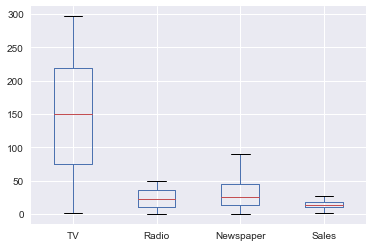

In [2]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

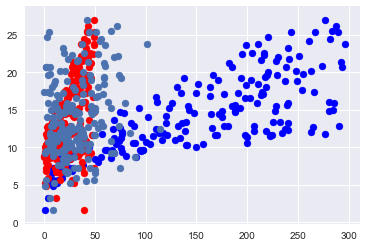

In [2]:
plt.scatter(df["TV"], df["Sales"], color='b')
plt.scatter(df["Radio"], df["Sales"], color ='r')
plt.scatter(df["Newspaper"], df["Sales"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022C81D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D103A635F8>]], dtype=object)

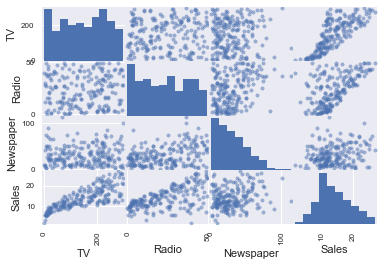

In [3]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer

#Answer here!

There appears to be some correlation between TV and Sales, and between Radio and Sales. This is because there appears to be a linear correlation between the two datasets.
It does not look like there is much correlation between Newpaper and Sales, or between any of the 3 features. There are no discernable patterns or correlations for these. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [4]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [5]:
Y = df["Sales"]

b) Set X to be just the features described above in df

In [6]:
X = df.ix[:,0:3]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [7]:
# Split the data into training/testing sets
size = len(X)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
size = len(Y)
y_train = Y[0:int(size*0.8)]
y_test = Y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [8]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

Ypred = regr.predict(X_test)

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(X_test, y_test))

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [9]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

Residual sum of squares: 2.79


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

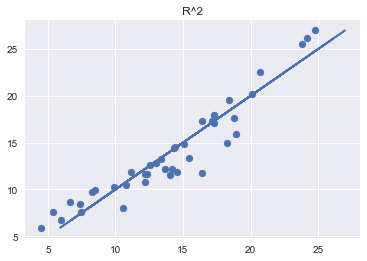

In [10]:
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [11]:
from sklearn.preprocessing import scale

standardized_X = scale(X)
size = len(standardized_X)
stdX_train = standardized_X[0:int(size*0.8)]
stdX_test = standardized_X[int(size*0.8):]

regr = LinearRegression()

regr.fit(X_train, y_train)
print('Non-normalized coefficients: \n', regr.coef_)
print("Non-normalized Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

regr_norm = LinearRegression()

# Train the model using the training sets
regr_norm.fit(stdX_train, y_train)

Ypred = regr_norm.predict(stdX_test)
print('Normalized Coefficients: \n', regr_norm.coef_)
print("Normalized Residual sum of squares: %.2f"
      % np.mean((regr_norm.predict(stdX_test) - y_test) ** 2))

Non-normalized coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Non-normalized Residual sum of squares: 2.79
Normalized Coefficients: 
 [ 4.04663787  2.66458107 -0.02050924]
Normalized Residual sum of squares: 2.79


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

#We can interpret the coefficeints as a measure of correlation between features and output. We should have normalized the data first.

You can conclude something about the magnitude of the relationship between each feature and Sales. None of the coefficients are very high, which indicates weak casual relationship between the features and sales.

To measure the importance of the features involved, normalize the data. After normalizing, the coefficients of the linear model change. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

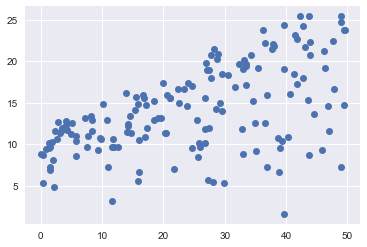

In [46]:
#plot sales on Y, TV and Radio on X
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# print(X_train.ix[:,0], X_train.ix[:,1], y_train.ix)
#x, y, z = X_train.ix[:,0], X_train.ix[:,1], y_train.ix[:]
# ax3 = Axes3D(fig)
# print([len(a) for a in (x, y, z)])
#plt.plot(y, z, 'o')
# ax3.plot_surface(x, y, z)

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

With learning rate = 0.0001: After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


112.64705664288809

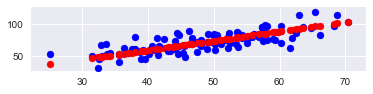

In [18]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    #print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("With learning rate = {4}: After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points), learning_rate))
    for i in range(0,len(points)):
        plt.subplot(311)
        plt.scatter(points[i,0],points[i,1], color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    err = compute_error_for_line_given_points(b, m, points)
    return err
    

run(100, 0.0001)

With learning rate = 0.0005: After 100 iterations b = -6887557902509816.0, m = -3.504281187420402e+17, error = 3.0612607979207772e+38


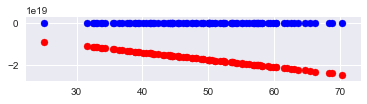

With learning rate = 0.0004: After 100 iterations b = 0.03786804177477676, m = 0.7050094848543003, error = 1603.9025064985485


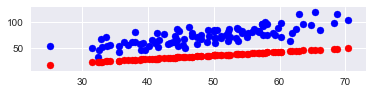

With learning rate = 0.0003: After 100 iterations b = 0.0470759787794631, m = 1.4785668413714852, error = 112.63985275851445


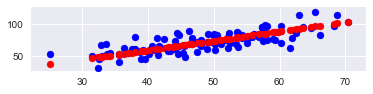

With learning rate = 1e-05: After 100 iterations b = 0.02949361544713032, m = 1.4700028426067162, error = 112.84803925712856


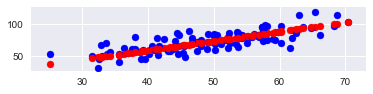

In [16]:
# Use this to visually discuss convergence rate based on learning rate
rates = [0.0005, 0.0004, 0.0003, 0.00001]
for num in rates:
    run(100, num)
    plt.show()

# 4 Learning rates are plotted. The solution converges very quickly below 0.0004; anything above that and it does not converge,
# below that and it converges rapidly. Apparently 0.0004 is the learning rate required to acheive a step size small enough to stay on
# the true "cost function minimization curve", and anything larger than that causes us to "bounce" to a higher cost area, and not
# reach our true minimum.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

With learning rate = 0.0005: After 25 iterations b = 641.3565078830833, m = 32630.82873413844, error = 2654112207342.6636
With learning rate = 0.0005: After 50 iterations b = -14149407.185843915, m = -719899595.3130887, error = 1.2919517552931682e+21
With learning rate = 0.0005: After 100 iterations b = -6887557902509816.0, m = -3.504281187420402e+17, error = 3.0612607979207772e+38
With learning rate = 0.0005: After 150 iterations b = -3.352681358983583e+24, m = -1.7057915708294825e+26, error = 7.253612709988501e+55
With learning rate = 0.0005: After 200 iterations b = -1.631996776503324e+33, m = -8.303343046665854e+34, error = 1.7187329280224378e+73


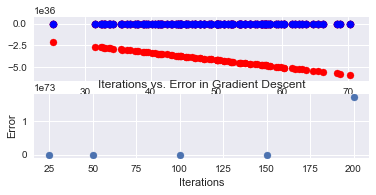

With learning rate = 0.0004: After 25 iterations b = 0.059794078275760595, m = 2.7364685972523666, error = 4055.7035017293806
With learning rate = 0.0004: After 50 iterations b = 0.020056875492041278, m = 0.4091727750538534, error = 2964.1457473376213
With learning rate = 0.0004: After 100 iterations b = 0.03786804177477676, m = 0.7050094848543003, error = 1603.9025064985485
With learning rate = 0.0004: After 150 iterations b = 0.054050189474712365, m = 0.918884988122509, error = 892.5250128874775
With learning rate = 0.0004: After 200 iterations b = 0.06904929861476565, m = 1.0734886585266246, error = 520.4885111878573


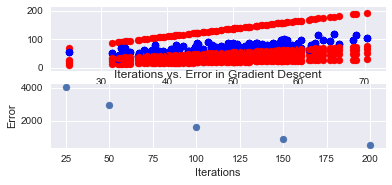

With learning rate = 0.0003: After 25 iterations b = 0.03357362203939417, m = 1.4788322606430007, error = 112.64795862802272
With learning rate = 0.0003: After 50 iterations b = 0.038076955243924133, m = 1.478743714437178, error = 112.64525361185571
With learning rate = 0.0003: After 100 iterations b = 0.0470759787794631, m = 1.4785668413714852, error = 112.63985275851445
With learning rate = 0.0003: After 150 iterations b = 0.05606481961733462, m = 1.478390168443612, error = 112.63446412075237
With learning rate = 0.0003: After 200 iterations b = 0.06504348927960345, m = 1.4782136954270961, error = 112.62908767094041


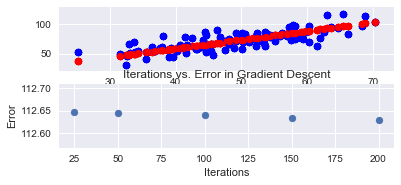

With learning rate = 1e-05: After 25 iterations b = 0.02112054104722636, m = 1.0669332235266382, error = 535.7714247002438
With learning rate = 1e-05: After 50 iterations b = 0.02711249515170944, m = 1.364147870044507, error = 145.48545327834353
With learning rate = 1e-05: After 100 iterations b = 0.02949361544713032, m = 1.4700028426067162, error = 112.84803925712856
With learning rate = 1e-05: After 150 iterations b = 0.029955524456195537, m = 1.4782119390618336, error = 112.65131561573433
With learning rate = 1e-05: After 200 iterations b = 0.030268488630640897, m = 1.4788435335686978, error = 112.64995143260448


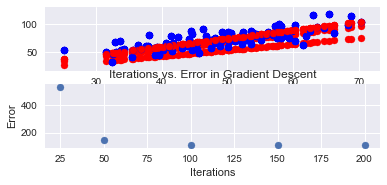

In [19]:
import pandas as pd
iterations = [25, 50, 100, 150, 200]


for rate in rates:
    errorList = []
    for i in range (0, len(iterations)):
        errorList.append(run(iterations[i], rate))
    
    plt.subplot(312)
    plt.scatter(iterations, errorList)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Iterations vs. Error in Gradient Descent')
    plt.show()

